In [6]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True).frame
df.to_csv('/home/kris/Public/iris.tsv', sep='\t')

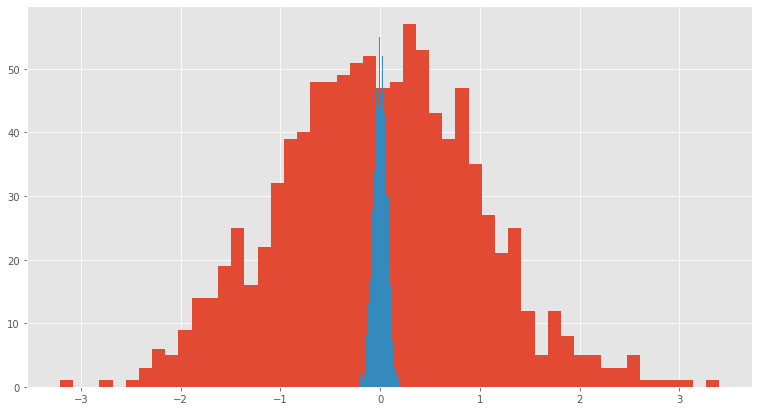

In [45]:
x = list('abc')

rng = jax.random.PRNGKey(13)

rnd = np.random.RandomState(rng[1])

pd.Series(rnd.randn(1000)).hist(bins=50)
pd.Series(rnd.randn(1000) * np.exp(-np.e)).hist(bins=50)
jax.ran

In [51]:
jax.random.bernoulli(rng, p=0.5)

DeviceArray(False, dtype=bool)

In [ ]:
%reload coax

import ray
from ray import tune
from ray.rllib.agents.trainer_template import build_trainer
from coax.contrib.rllib import DQNPolicy


env = gym.make('FrozenLakeNonSlippery-v0')


# <class 'ray.rllib.agents.trainer_template.MyCustomTrainer'>
DQNTrainer = build_trainer(
    name='DQNTrainer',
    default_policy=DQNPolicy,
    default_config=DQNPolicy.DEFAULT_CONFIG)

pprint(DQNPolicy.DEFAULT_CONFIG)

def forward_pass(S, is_training):
    # one-hot encode?
    if jnp.issubdtype(S.dtype, jnp.integer):
        S = hk.one_hot(S, env.observation_space.n)

    values = hk.Linear(env.action_space.n, w_init=jnp.zeros)
    return values(S)  # shape: (batch_size, num_actions)
    
    

if not ray.is_initialized():
    ray.init()
shutil.rmtree('/home/kris/ray_results/')


tune.run(DQNTrainer, config={
    'env': 'FrozenLakeNonSlippery-v0',
    'num_workers': 2,
    'func_q': forward_pass,
    'learning_rate': 0.01,
    'log_level': 'INFO',
})